In [1]:
import zipfile
import os
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Function to extract files from ZIP archive
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted files to {extract_to}")

# Step 1: Path to the ZIP file
zip_file_path = '/content/dataset.zip'
extract_path = '/content/extracted_files'
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
extract_zip(zip_file_path, extract_path)

Extracted files to /content/extracted_files


In [2]:
barrel_path='/content/extracted_files/barrel_images_temp'
lions_path='/content/extracted_files/lions_images_temp'

In [3]:
def load_The_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
            labels.append(label)
    return images, labels

barrel_images, barrel_labels = load_The_images(barrel_path, 0)#images of normal,label=0
lions_images, lions_labels = load_The_images(lions_path, 1)#images of unnormal , label =1



In [4]:
X = np.array(barrel_images + lions_images)
y = np.array(barrel_labels + lions_labels)

In [5]:
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from skimage.color import rgb2gray


def extract_hog_features(images):
    hog_features = []
    for img in images:
        gray_img = rgb2gray(img)  # Convert to grayscale
        features = hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False)
        hog_features.append(features)
    return hog_features





In [6]:
X_hog = extract_hog_features(X)

In [7]:
from sklearn.model_selection import train_test_split

# Assuming `X_hog` and `X_sift` are the feature sets, and `labels` are the corresponding labels
X_train_hog, X_test_hog, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

In [8]:
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ANN with HOG has accuracy score:  0.835
ANN with HOG Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82        96
           1       0.81      0.88      0.85       104

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



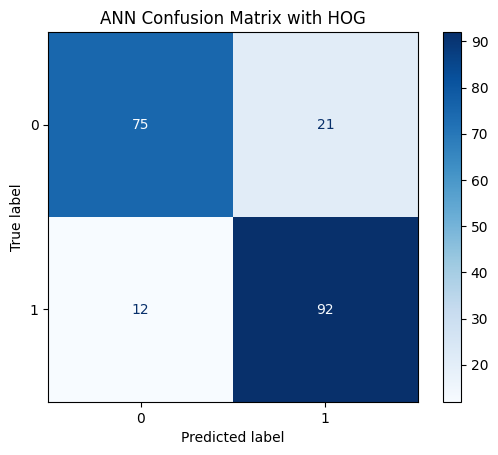

In [11]:
clf_ann_hog = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500)
clf_ann_hog.fit(X_train_hog, y_train)
y_pred_ann_hog = clf_ann_hog.predict(X_test_hog)
cm_ann_hog = confusion_matrix(y_test, y_pred_ann_hog)
ConfusionMatrixDisplay(cm_ann_hog, display_labels=[0, 1]).plot(cmap='Blues')
print("ANN with HOG has accuracy score: " ,accuracy_score(y_test, y_pred_ann_hog))
print("ANN with HOG Classification Report:\n", metrics.classification_report(y_test, y_pred_ann_hog))
plt.title("ANN Confusion Matrix with HOG")
plt.show()